# **NKUST Data Mining Introduction Final Project --Tic-Tac-Toe**
<center>
  <img src='https://cdn-icons-png.flaticon.com/512/1429/1429455.png' width='20%'>
</center>
<div align='right'>Icons made by <a href="https://www.flaticon.com/authors/freepik" title="Freepik">Freepik</a> from <a href="https://www.flaticon.com/" title="Flaticon">www.flaticon.com</a></div>

- **已將期末專案放上GitHub。**
> 使用Google提供的服務[`Teachable Machine`](https://teachablemachine.withgoogle.com/)來訓練Model
>
> https://github.com/hsiangjenli/NKUST/tree/main/Data-Mining-Introduction

- **其他附件（影像辨識用圖片 1~9，可下載至手機後使用）**
> https://github.com/hsiangjenli/NKUST/tree/main/Data-Mining-Introduction/Images

- **Author**
> [@Hsiang-Jen Li｜李享紝](https://github.com/hsiangjenli)

## **Import Teachable Machine's Model from GitHub**

1. `OneToNine.h5`

In [ ]:
import requests

models = ['OneToNine']
imgs = ['X', 'O', 'None']

for model in models:
    url = f'https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Teachable%20Machine/{model}.h5?raw=true'
    r = requests.get(url)
    with open(f'{model}.h5', 'wb') as f:
        f.write(r.content)
for img in imgs:
    url = f'https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Images/{img}.png?raw=true'
    r = requests.get(url)
    with open(f'{img}.png', 'wb') as f:
        f.write(r.content)

In [ ]:
from keras.models import load_model
import tensorflow.keras

model_OneToNine = load_model('OneToNine.h5')

## **Import require lib**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

from matplotlib.pyplot import imshow
from IPython.display import Image
from PIL import Image, ImageOps

import numpy as np
import random

%matplotlib inline

In [ ]:
# ==============================================================================
def take_photo(fname, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;

      // 翻轉鏡頭
      video.style.webkitTransform = "scaleX(-1)"; 
      video.style.transform = "scaleX(-1)";
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(fname, 'wb') as f:
    f.write(binary)
  return fname
# ==============================================================================
def Ourturn(fname):
    try:
        take_photo(fname=fname)
        displayImage(fname)
    except Exception as err:
        print(str(err))
# ==============================================================================
def displayImage(fname):
    image = Image.open(fname)
    image_array = np.asarray(image)
    imshow(image_array)
    image.show()
# ==============================================================================
def Loc(fname):
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = Image.open(fname)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    prediction = model_OneToNine.predict(data)
    return np.argmax(prediction)
# ==============================================================================
def Initialize():
    Panel = [[None, None, None],
             [None, None, None],
             [None, None, None]]
    LocationList = [i for i in range(9)]
    return Panel, LocationList
# ==============================================================================
def addMarker(Panel, num, marker):
    if Panel[num//3][num%3] == None:
        Panel[num//3][num%3] = marker
    else:
        pass
    return Panel
# ==============================================================================
def OneLineOccur(Panel):
    j = 0
    for i in range(3):
        if len(set(Panel[i])) == 1 and Panel[i][0] != None:
            return True, Panel[i][0]
        if len(set([Panel[j][i], Panel[j+1][i], Panel[j+2][i]])) == 1 and Panel[j][0+i] != None:
            # 2022-01-01 更新
            return True, Panel[j][i]
    if len(set(np.diag(Panel))) == 1 and Panel[1][1] != None:
        return True, Panel[1][1]
    elif len(set(np.diag(np.fliplr(Panel)))) == 1 and Panel[1][1] != None:
        return True, Panel[1][1]
    else:
        return False, None
# ==============================================================================
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import matplotlib.pyplot as plt

def showImagesHorizontally(Panel):
    for r in range(len(Panel)):
        fig = figure()
        for i in range(len(Panel[0])):
            fig.add_subplot(1,len(Panel),i+1)
            image = imread(f'{Panel[r][i]}.png')
            imshow(image,cmap='Greys_r')
            axis('off')
    plt.show()

## **Intialize**

<p align= 'center'>
    <img src='https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Images/1.png?raw=true' width='5%'>
    <img src='https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Images/2.png?raw=true' width='5%'>
    <img src='https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Images/3.png?raw=true' width='5%'><br>
    <img src='https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Images/4.png?raw=true' width='5%'>
    <img src='https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Images/5.png?raw=true' width='5%'>
    <img src='https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Images/6.png?raw=true' width='5%'><br>
    <img src='https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Images/7.png?raw=true' width='5%'>
    <img src='https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Images/8.png?raw=true' width='5%'>
    <img src='https://github.com/hsiangjenli/NKUST/blob/main/Data-Mining-Introduction/Images/9.png?raw=true' width='5%'>
</p>

- **附件下載（辨識用）**
> https://github.com/hsiangjenli/NKUST/tree/main/Data-Mining-Introduction/Images

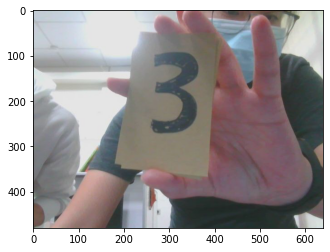

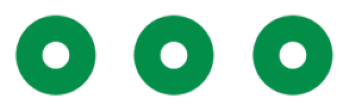

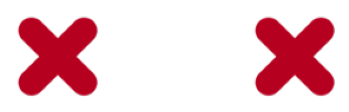

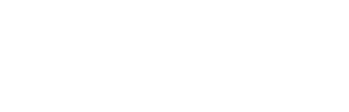

Winner is O


In [ ]:
from IPython.display import clear_output as clear
import sys

userMarker = 'O'
computerMarker = 'X'
occur = False
Panel, LocationList = Initialize()
g = 0
markerNotExist = True

while g < 10:
    # User Loc ==================================================
    if occur == False:
        while markerNotExist:
            Ourturn(fname='loc.jpg')
            userLoc = Loc(fname='loc.jpg')
            
            confirm = input(f'你輸入的是"{userLoc+1}"嗎? 請回復y或者是{[loc+1 for loc in LocationList]}其中的一個數字。')
            if confirm == 'y':
                if userLoc in LocationList:
                    LocationList.remove(userLoc)
                    markerNotExist = False
                elif userLoc not in LocationList:
                    print(f'您輸入的數值{userLoc+1}，已經有marker了')
            else:
                userLoc = int(confirm)-1
                if userLoc in LocationList:
                    LocationList.remove(userLoc)
                    markerNotExist = False
                elif userLoc not in LocationList:
                    print(f'您輸入的數值{userLoc+1}，已經有marker了')

        Panel = addMarker(Panel, userLoc, userMarker)
        occur, winner = OneLineOccur(Panel)
        clear()
        showImagesHorizontally(Panel)
        g += 1
        markerNotExist = True
    else:
        print(f'Winner is {winner}')
        g = 11

    # Computer Loc ==================================================
    if occur == False:
        computerLoc = np.random.choice(LocationList)
        LocationList.remove(computerLoc)
        Panel = addMarker(Panel, computerLoc, computerMarker)
        clear()
        showImagesHorizontally(Panel)
        occur, winner = OneLineOccur(Panel)
        g += 1
    
    else:
        print(f'Winner is {winner}')
        g = 11